In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [2]:
G = nx.Graph()
G.add_edges_from([('1','2'),('1','4'),('2','3'),('2','4'),('3','4'),('4','5'),('5','6'),('5','7'),('6','7')])  # create the graph 
print(G.nodes(), '\n', G.edges(), '\n', G.degree())  # check graph is correct

['1', '2', '4', '3', '5', '6', '7'] 
 [('1', '2'), ('1', '4'), ('2', '3'), ('2', '4'), ('4', '3'), ('4', '5'), ('5', '6'), ('5', '7'), ('6', '7')] 
 [('1', 2), ('2', 3), ('4', 4), ('3', 2), ('5', 3), ('6', 2), ('7', 2)]


In [3]:
print(nx.degree(G))
adj = nx.adj_matrix(G)
print(adj)
print("adjency matrix: \n", adj.todense()) # print adjency matrix

G_degree = np.sum(adj, axis=1)
k_ij = np.outer(G_degree, G_degree)

mod = adj - k_ij / (2.*len(G.edges()))
print("modularity matrix: \n", mod)

# suppose we only have 2 communities, we can iterate all the possible situations and get the optimum partition
modval_opt = -100000
z_opt = np.zeros((len(G.nodes()), 2))

for i in range(0, 2**(len(G.nodes())-1)):   # iterate all the possible membership

    partition = np.matrix(list(map(int, list('{0:07b}'.format(i)))))    # get a membership vector directly from the bits of an interger
                                                                        # e.g. i = 2, list('{0:07b}'.format(i)) will give a list 
                                                                        # ['0', '0', '0', '0', '0','1','0']
                                                                        # map(int, list) will change it to be a int list [..., 1, 0]
    Z = np.transpose(np.concatenate((partition, 1-partition)))          # this is a 7x2 membership matrix
    modval_partition = np.trace(Z.transpose() * mod * Z) / (2*len(G.edges()))
    if modval_opt < modval_partition:
        modval_opt = modval_partition
        z_opt = Z
        
print("\n optimal community membership: \n", z_opt, "\n corresponds to maximum modularity value:\n", modval_opt)


[('1', 2), ('2', 3), ('4', 4), ('3', 2), ('5', 3), ('6', 2), ('7', 2)]
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (4, 2)	1
  (4, 5)	1
  (4, 6)	1
  (5, 4)	1
  (5, 6)	1
  (6, 4)	1
  (6, 5)	1
adjency matrix: 
 [[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 1 1 0 0]
 [0 1 1 0 0 0 0]
 [0 0 1 0 0 1 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]]
modularity matrix: 
 [[-0.22222222  0.66666667  0.55555556 -0.22222222 -0.33333333 -0.22222222
  -0.22222222]
 [ 0.66666667 -0.5         0.33333333  0.66666667 -0.5        -0.33333333
  -0.33333333]
 [ 0.55555556  0.33333333 -0.88888889  0.55555556  0.33333333 -0.44444444
  -0.44444444]
 [-0.22222222  0.66666667  0.55555556 -0.22222222 -0.33333333 -0.22222222
  -0.22222222]
 [-0.33333333 -0.5         0.33333333 -0.33333333 -0.5         0.66666667
   0.66666667]
 [-0.22222222 -0.33333333 -0.44444444 -0.22222222  0.66666667 -0.22222222
   0.77777778]
 [-0.22222222 -0.33333333 -0.44444444 

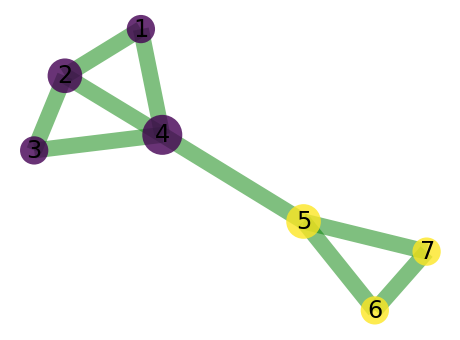

In [4]:
# print the graph with community in different color and node size propotional to its degree

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=np.array(z_opt.transpose())[0], 
                       node_size=400*np.array(G_degree), alpha=0.8, linewidths=0)
labels = {}
for node in G.nodes():
    labels[node] = r'$'+node+'$'
    
nx.draw_networkx_labels(G, pos, labels, font_size=24)
nx.draw_networkx_edges(G, pos, width=16, edge_color='g', alpha=0.5)

plt.axis('off')
plt.show()

In [5]:
import networkx as nx
import numpy as np
from copy import deepcopy

In [6]:
# read data from input.txt

filename = 'input.txt'
f = open(filename, 'r')
node_num = int(next(f))
matrix = np.array([[int(x) for x in line.split()] for line in f])
f.close


[[0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 1 1 1]
 [0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 1 1 0]]


In [15]:
# Problem 3a

G = nx.from_numpy_matrix(matrix)
ans = []

while len(ans[-1] if len(ans) > 0 else ans) != node_num-1:
    edge_btwns = nx.edge_betweenness_centrality(G)
    sorted_edge_btwns = {edge: btwns for edge, btwns in sorted(edge_btwns.items(), key=lambda edge: edge[1], reverse=True)}
    sorted_edge_btwns = list(sorted_edge_btwns.items())

    highest = sorted_edge_btwns[0][1]
    while len(sorted_edge_btwns) > 0 and sorted_edge_btwns[0][1] == highest:
        edge, _ = sorted_edge_btwns.pop(0)
        G.remove_edge(*edge)
    ans.append(list(nx.connected_components(G)))
    if len(sorted_edge_btwns) == 0:
        break
    
for i, result in enumerate(ans):
    ans[i] = list(map(lambda comm: sorted(comm), [list(comm) for comm in result]))
    
ans = list(map(lambda result: sorted(result, key=len, reverse=True), ans))
for result in ans:
    print(tuple([list(component) for component in result]))
    
ans

([0, 1, 2, 3], [5, 6, 7, 8], [4])
([0], [1], [2], [3], [4], [5], [6], [7], [8])


[[[0, 1, 2, 3], [5, 6, 7, 8], [4]],
 [[0], [1], [2], [3], [4], [5], [6], [7], [8]]]

In [17]:
nx.edge_betweenness_centrality(G)

{(0, 1): 0.027777777777777776,
 (0, 2): 0.027777777777777776,
 (0, 3): 0.16666666666666666,
 (1, 2): 0.027777777777777776,
 (1, 3): 0.16666666666666666,
 (2, 3): 0.16666666666666666,
 (3, 4): 0.5555555555555556,
 (4, 5): 0.5555555555555556,
 (5, 6): 0.16666666666666666,
 (5, 7): 0.16666666666666666,
 (5, 8): 0.16666666666666666,
 (6, 7): 0.027777777777777776,
 (6, 8): 0.027777777777777776,
 (7, 8): 0.027777777777777776}

In [16]:
modval_opt = -100000
G_opt = None

G = nx.from_numpy_matrix(matrix)
adj_matrix = nx.adj_matrix(G)

G_degree = np.sum(adj_matrix, axis=1)
k_ij = np.outer(G_degree, G_degree)

mod = adj_matrix - k_ij / (2.*len(G.edges()))
    
for comms in ans:    
    Z = np.zeros((len(comms), node_num), dtype=np.float32)
    for i, comm in enumerate(comms):
        np.put(Z[i], np.array(list(comm)), 1)
    
    modval_partition = np.trace(Z * mod * Z.T) / (2*len(G.edges()))
    
    print('%d clusters: modularity %.4f' % (len(comms), modval_partition))
    if modval_opt < modval_partition:
        modval_opt = modval_partition
        G_opt = [list(component) for component in comms]

print("optimal structure: ", tuple(G_opt))


3 clusters: modularity 0.4209
9 clusters: modularity -0.1148
optimal structure:  ([0, 1, 2, 3], [5, 6, 7, 8], [4])
